tips url: https://blog.csdn.net/weixin_37272286/article/details/81276110

tips url: https://sylvanassun.github.io/2017/12/20/2017-12-20-naive_bayes/

In [1]:
import numpy as np
import matplotlib.pyplot as plt
!pip install interval  # you have to install the interval package
from interval import Interval, IntervalSet

Looking in indexes: https://pypi.douban.com/simple/


Fristly, you have to load the your data, which has two feature 'height' and 'weight'.

Secondly, you have to load the label, including '0' for woman and '1' for man.

Notes: the missing labels have been replaced by 'None'.

In [2]:
heights = [170,130,180,190,160,150,190,210,100,170,140,150,120,150,130,140,150,145,160]
weights = [68,66,71,73,70,66,68,76,58,75,62,64,66,66,65,70,60,65,75]
labels = [1,0,1,1,0,1,1,1,0,1,1,0,0,1,1,None,None,None,None]

data  = np.array([[heights[i], weights[i]] for i in range(len(heights))])
# print(data)

In [3]:
# Because the data is continuous variables, so I have to divide them into discrete interval,
# such as height in [140, 150) or [150, 160)...

# initialize the dictionary for intervals
def initialize_dict():
    woman_height_dict = dict()
    man_height_dict = dict()
    woman_weight_dict = dict()
    man_weight_dict = dict()

    for i in range(10):
        # To make sure all of conditional probability winthin interval isn't 0. 
        # So I initilize '1' in all intervals. 
        woman_height_dict.update({Interval(100 + i * 10, 100 + (i+1)*10, upper_closed=False) : 1})
    woman_height_dict.update({Interval(200,210) : 1})
    man_height_dict = woman_height_dict.copy()
#     print(woman_height_dict)

    for j in range(5):
        woman_weight_dict.update({Interval(55 + j * 5, 55 + (j+1)*5, upper_closed=False) : 1})
    man_weight_dict = woman_weight_dict.copy()
    return woman_height_dict, woman_weight_dict, man_height_dict, man_weight_dict

In [4]:
def prior_probability(labels):
    # calculate the number of label, which isn't None.
    prior_number = len(labels) - labels.count(None) 
    
    # calculate the prior probability for woman and man separately.
    woman_num = labels.count(0)
    man_num = labels.count(1)
    prior_woman =  woman_num / prior_number
    prior_man = man_num / prior_number
#     print(prior_woman, prior_man)
    
    return prior_number, prior_woman, prior_man

In [5]:
# calculate the conditional probability for heights and weights for man and woman separately.
def conditional_probability(dict_):
    woman_height_pr, woman_weight_pr, man_height_pr, man_weight_pr = dict_
    num = [0,0,0,0]
    i = 0
    for dict__ in dict_:
#         print(dict__)
        for key in dict__:
            if dict__[key] > 0:
                num[i] += dict__[key]
        i += 1
    
#     print(num)
        
    woman_height_num = num[0]; woman_weight_num = num[1]; man_height_num = num[2]; man_weight_num = num[3]

    for key in woman_height_pr:
        woman_height_pr[key] = round(woman_height_pr[key] / woman_height_num, 3)
    for key in woman_weight_pr:
        woman_weight_pr[key] = round(woman_weight_pr[key] / woman_weight_num, 3)
    for key in man_weight_pr:
        man_weight_pr[key] =  round(man_weight_pr[key] / man_weight_num, 3)
    for key in man_height_pr:
        man_height_pr[key] =  round(man_height_pr[key] / man_height_num, 3)
        
#     print(woman_height_pr); print(woman_weight_pr)
#     print(man_height_pr); print(man_weight_pr)
    return (woman_height_pr, woman_weight_pr, man_height_pr, man_weight_pr)

In [6]:
def posterior_probability(data_dict, cond_pr_dict, prior, test_data):
    """
    parameters:
        data_dict: the dictionary for real height and weight.
        cond_pr_dict: the dictionary for conditional probability of height and weight.
        prior: an array for prior probability for woman and man. 
    return:
        a list of posterior_probability for each class
        Note: be careful! this function does not calculate the total probability, because they are same denominator for woman and man. 
    """
#     woman_height_dict, woman_weight_dict, man_height_dict, man_weight_dict = data_dict
    woman_height_pr, woman_weight_pr, man_height_pr, man_weight_pr = cond_pr_dict
    prior_woman, prior_man = prior
    
    h = test_data[0] # the height of test data
    w = test_data[1] # the weight of test data
    
    # initialize the posterior probability for woman and man
    posterior_woman = 1 * prior_woman
    posterior_man = 1 * prior_man
    
    # calculate the posterior probability for woman
    for height_interval in woman_height_pr:
        if h in height_interval:
            posterior_woman *= woman_height_pr[height_interval]
    for weight_interval in woman_weight_pr:
        if w in weight_interval:
            posterior_woman *= woman_weight_pr[weight_interval]
    
    # calculate the posterior probability for man
    for height_interval in man_height_pr:
        if h in height_interval:
            posterior_man *= man_height_pr[height_interval]
    for weight_interval in man_weight_pr:
        if w in weight_interval:
            posterior_man *= man_weight_pr[weight_interval]
    
    return round(posterior_woman,5), round(posterior_man,5)

In [7]:
def update_interval(prior_number,labels, data):
    # If one person's height or weight belongs to one special interval, then the special interval in dictionary has to update.
    # For example, if one person's height is 175, then she/he belongs to (170,180].
    woman_height_dict, woman_weight_dict, man_height_dict, man_weight_dict = initialize_dict()
    for i in range(prior_number):
        h = data[i][0]
        w = data[i][1]
        if labels[i] == 0: # if this person is woman
#             print('woman\'s h:',h, 'w:',w)
            for key in woman_height_dict:
#                 print(key)
                if h in key:
                    woman_height_dict[key] += 1
            for key in woman_weight_dict:
                if w in key:
                    woman_weight_dict[key] += 1
        else: # if this person is man
#             print('man\'s h:',h, 'w:',w)
            for key in man_height_dict:
                if h in key:
                    man_height_dict[key] += 1
            for key in man_weight_dict:
                if w in key:
                    man_weight_dict[key] += 1
#     print(woman_height_dict); print(woman_weight_dict)
#     print(man_height_dict); print(man_weight_dict)
    return (woman_height_dict, woman_weight_dict, man_height_dict, man_weight_dict)

In [8]:
def plot(labels, data):
    num = data.shape[0]
    plt.xlabel('height')
    plt.ylabel('weight')
    k = False
    for i in range(num):
        if labels[i] == 0:
            p1 = plt.scatter(data[i][0], data[i][1], c='red')
        elif labels[i] == 1:
            p2 = plt.scatter(data[i][0], data[i][1], c='blue')
        else:
            p3 = plt.scatter(data[i][0], data[i][1], c='black')
            k = True
    if k == True:
        plt.legend([p1, p2, p3], ['Woman', 'Man', 'Unknown'], loc='upper left')
    else:
        plt.legend([p1, p2], ['Woman', 'Man'], loc='upper left')
    plt.show()

In [9]:
def naive_bayes(data, labels):
    # first plot the data distribution
    plot(labels, data)
    
    prior_number, prior_woman, prior_man = prior_probability(labels)
#     print(prior_woman, prior_man)
    data_dict = update_interval(prior_number, labels, data)
    
    cond_pr_dict = conditional_probability(data_dict)
    
#     test_data = data[18]
#     print(test_data)
    print('Compare the posterior probability：\n Woman \t man')
    for i in range (data.shape[0]):
        if labels[i] == None:
            
            posterior_woman, posterior_man = posterior_probability(data_dict, cond_pr_dict, (prior_woman, prior_man), data[i])
            print(posterior_woman, posterior_man)
            label = 0 if posterior_woman>posterior_man else 1
            labels[i] = label
    
    plot(labels, data)
    
    

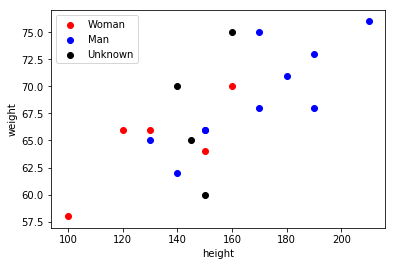

Compare the posterior probability：
 Woman 	 man
0.00413 0.01267
0.00833 0.01268
0.0062 0.02533
0.00417 0.0064


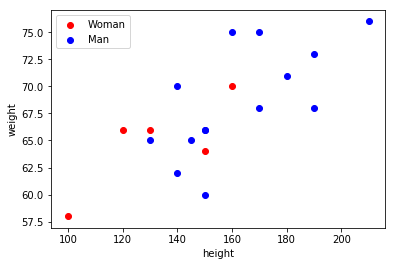

In [10]:
naive_bayes(data, labels)